Install Kaggle library

In [ ]:
!pip install kaggle

In [ ]:
#configure path of kaggle.jason file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Importing dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:10<00:00, 163MB/s]
100% 812M/812M [00:10<00:00, 83.7MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting compact dataset
from zipfile import ZipFile

data='/content/dogs-vs-cats.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#extracting compact dataset
from zipfile import ZipFile

data='/content/train.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
#counting number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("Number of imgaes: ",file_count)

if not os.path.exists('/content/image resized'):
    os.mkdir('/content/image resized')
    print("Directory created successfully!")
else:
    print("Directory already exists.")


Number of imgaes:  25000
Directory created successfully!


In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg', 'dog.3333.jpg', 'cat.11539.jpg', 'cat.7346.jpg', 'cat.9806.jpg', 'cat.1542.jpg', 'dog.706.jpg', 'dog.11469.jpg', 'cat.7279.jpg', 'dog.4874.jpg', 'dog.1295.jpg', 'dog.11527.jpg', 'cat.382.jpg', 'cat.12447.jpg', 'cat.12108.jpg', 'dog.8221.jpg', 'dog.6015.jpg', 'dog.9544.jpg', 'dog.4448.jpg', 'dog.3086.jpg', 'cat.12145.jpg', 'dog.9763.jpg', 'cat.7725.jpg', 'dog.1224.jpg', 'dog.5870.jpg', 'cat.5296.jpg', 'dog.5204.jpg', 'cat.7630.jpg', 'dog.9744.jpg', 'cat.6114.jpg', 'cat.376.jpg', 'cat.9376.jpg', 'cat.872.jpg', 'cat.3666.jpg', 'cat.3588.jpg', 'cat.8040.jpg', 'cat.11391.jpg', 'cat.7813.jpg', 'dog.1983.jpg', 'cat.311.jpg', 'dog.7802.jpg', 'dog.4825.jpg', 'dog.10680.jpg', 'dog.206.jpg', 'dog.9846.jpg', 'cat.7126.jpg', 'cat.11809.jpg', 'cat.10434.jpg', 'dog.672.jpg', 'cat.6522.jpg', 'dog.5717.jpg', 'dog.9948.jpg', 'cat.7647.jpg', 'dog.6262.jpg', 'cat.10670.jpg', 'dog.5766.jpg', 'dog.10128.jpg', 'dog.1587.jpg', 'd

Importing necessary libraries

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

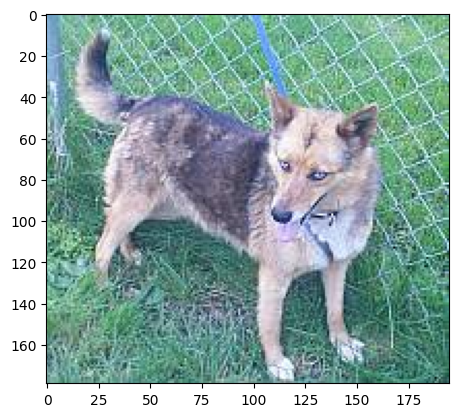

In [ ]:
#Display Images
img=mpimg.imread('/content/train/dog.12102.jpg')
imgplot=plt.imshow(img)
plt.show()

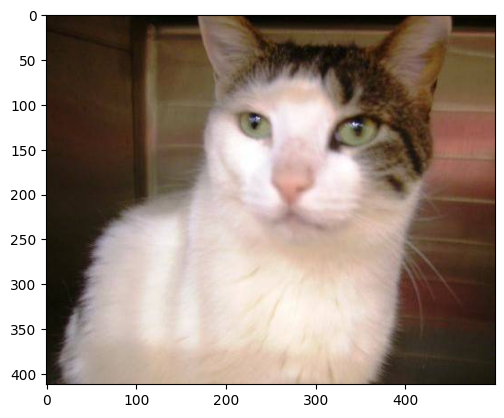

In [ ]:
#Display Images
img=mpimg.imread('/content/train/cat.7445.jpg')
imgplot=plt.imshow(img)
plt.show()

Resizing Images

In [ ]:
file_names=os.listdir('/content/train')

for i in range (5):
  #img=Image.open('/content/train/'+img_file)
  #img=img.resize((150,150))
  name=file_names[i]
  print(name[0:3])

cat
cat
dog
cat
cat


In [ ]:
file_names=os.listdir('/content/train')
d_count=0
c_count=0
for img_file in file_names:
  name=img_file[0:3]
  if name=='cat':
    c_count+=1
  else:
    d_count+=1

print('Number of dogs: ',d_count)
print('Number of cats: ',c_count)

Number of dogs:  12500
Number of cats:  12500


In [ ]:
#Directory for resized images
os.mkdir('/content/image resized')

In [ ]:
from ctypes import resize
org_folder='/content/train/'
resize_folder='/content/image resized/'

for i in range(2000):
  fileName=os.listdir(org_folder)[i]
  img_path=org_folder+fileName
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')

  new_path=resize_folder+fileName
  img.save(new_path)


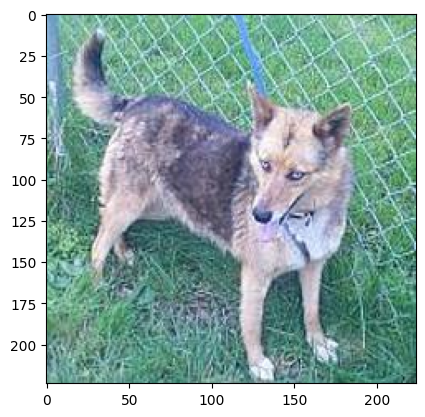

In [ ]:
#display resized image
img=mpimg.imread('/content/image resized/dog.12102.jpg')
imgplot=plt.imshow(img)
plt.show()

Create image labels

In [ ]:
#Assigning labels
filenames=os.listdir('/content/image resized')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


In [ ]:
#counting the images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1040  960]


In [ ]:
#Converting resized images to numpy arrays
import cv2
import glob


In [ ]:
image_directory='/content/image resized'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'/*.jpg'))for e in image_extension]
dcimages=np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dcimages)     #pixel values

[[[[ 40  77 133]
   [ 27  63 117]
   [ 16  50 103]
   ...
   [  5  12  15]
   [  3   8   6]
   [  1   5   0]]

  [[ 35  72 128]
   [ 25  61 115]
   [ 16  50 103]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  [[ 29  64 120]
   [ 22  58 112]
   [ 18  52 105]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  ...

  [[ 97  68  24]
   [ 97  68  23]
   [ 98  69  24]
   ...
   [104  78  24]
   [101  76  20]
   [ 97  72  16]]

  [[ 94  66  25]
   [ 94  67  23]
   [ 93  66  22]
   ...
   [107  81  27]
   [103  78  22]
   [ 98  74  16]]

  [[ 89  61  20]
   [ 89  61  20]
   [ 89  62  18]
   ...
   [108  83  27]
   [103  78  22]
   [ 99  75  17]]]


 [[[253 255 254]
   [250 253 251]
   [249 251 252]
   ...
   [249 252 250]
   [255 254 253]
   [255 255 254]]

  [[246 248 248]
   [241 243 243]
   [239 241 242]
   ...
   [236 239 237]
   [243 241 240]
   [252 250 249]]

  [[240 242 243]
   [233 235 236]
   [227 229 230]
   ...
   [220 222 222]
   [232 230 230]
   [249 247

In [ ]:
type(dcimages)

numpy.ndarray

In [ ]:
print(dcimages.shape)

(4000, 224, 224, 3)


In [ ]:
X=dcimages
Y=np.asarray(labels)
print(X.shape)
print(Y.shape)

X_truncated=X[:2000]

(4000, 224, 224, 3)
(2000,)


Train Test split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test=train_test_split(X_truncated,Y,test_size=0.2,random_state=2)
print(X_truncated.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600--->training images
800---> Testing images

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled)
print(X_test_scaled)

[[[[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39607843 0.36470588 0.39215686]
   ...
   [0.91764706 0.84705882 0.80392157]
   [0.95294118 0.87843137 0.82745098]
   [0.97647059 0.90196078 0.85098039]]

  [[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.92156863 0.85098039 0.80784314]
   [0.97254902 0.89803922 0.84705882]
   [1.         0.93333333 0.88235294]]

  [[0.38823529 0.35686275 0.38431373]
   [0.38823529 0.35686275 0.38431373]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.93333333 0.8627451  0.81960784]
   [0.99607843 0.92941176 0.87843137]
   [1.         0.97254902 0.92156863]]

  ...

  [[0.17254902 0.28235294 0.41568627]
   [0.17647059 0.28627451 0.41960784]
   [0.20392157 0.31372549 0.44705882]
   ...
   [0.25098039 0.27058824 0.32941176]
   [0.24313725 0.2627451  0.32156863]
   [0.23921569 0.25882353 0.31764706]]

  [[0.11764706 0.21960784 0.36078431]
   [0.1

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model='https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [ ]:
num_of_classes=2
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.1747 - accuracy: 0.9300
Epoch 2/5
50/50 [==============================] - 96s 2s/step - loss: 0.0730 - accuracy: 0.9769
Epoch 3/5
50/50 [==============================] - 83s 2s/step - loss: 0.0557 - accuracy: 0.9850
Epoch 4/5
50/50 [==============================] - 99s 2s/step - loss: 0.0473 - accuracy: 0.9881
Epoch 5/5
50/50 [==============================] - 88s 2s/step - loss: 0.0380 - accuracy: 0.9919


In [ ]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print("Test Loss= ",score)
print("Test accuracy= ",acc)


13/13 [==============================] - 19s 1s/step - loss: 0.0384 - accuracy: 0.9850
Test Loss=  0.038419488817453384
Test accuracy=  0.9850000143051147


Prediction system

Path of the image to be predicted: /content/cat_check.webp


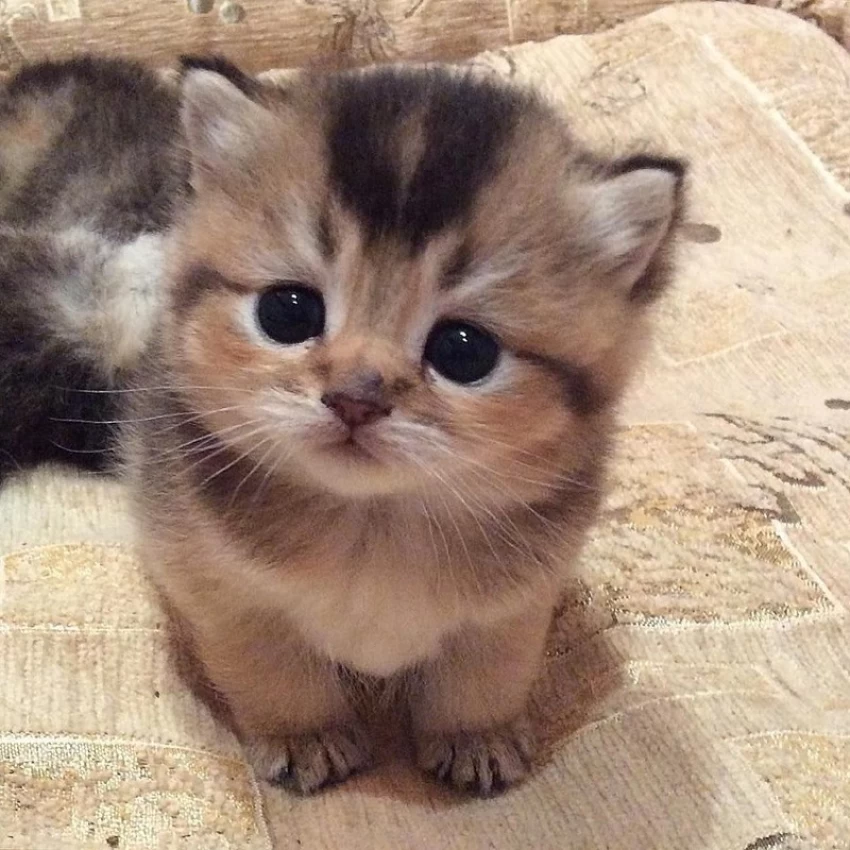

1/1 [==============================] - 1s 1s/step
0
The image contains a cat


In [ ]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshape=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshape)
input_prediction=np.argmax(input_prediction)
print(input_prediction)
if input_prediction==1:
  print('The image contains a dog')
else:
  print('The image contains a cat')

Path of the image to be predicted: /content/dog_check.jpg


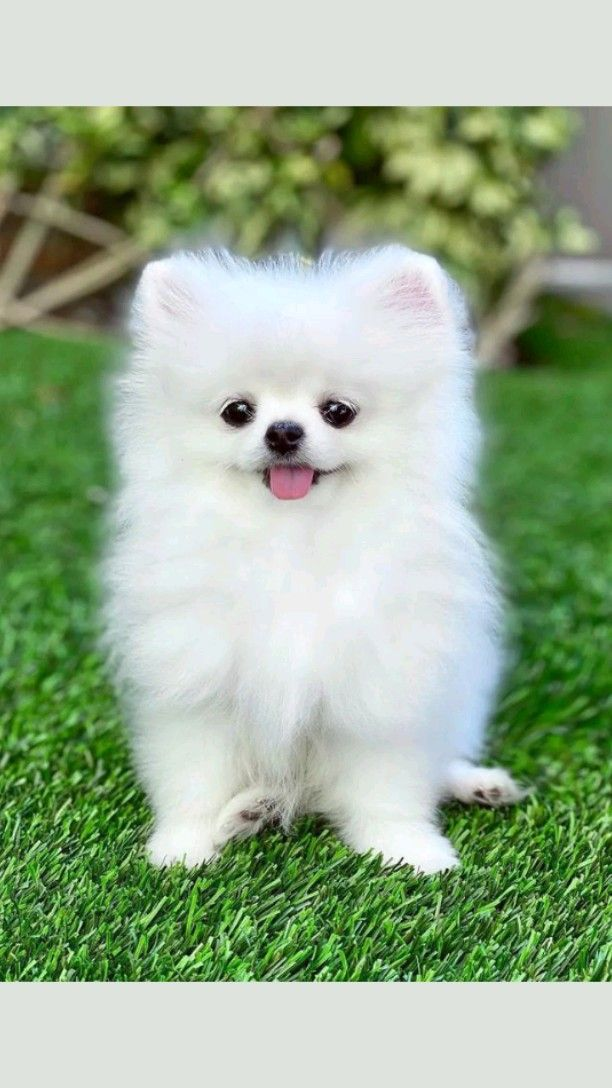

1/1 [==============================] - 0s 105ms/step
1
The image contains a dog


In [ ]:
input_image_path=input('Path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshape=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshape)
input_prediction=np.argmax(input_prediction)
print(input_prediction)
if input_prediction==1:
  print('The image contains a dog')
else:
  print('The image contains a cat')